In [1]:
from pysnake_env import *
import sys
sys.path.append("../Agent/")
import os
from agent import *
from evaluation import *

pygame 2.1.0 (SDL 2.0.16, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
env = SnakeEnv()

In [3]:
# Initialize the DQN agent
state_size = 11  # Example: size of the state space
action_size = 4  # Example: number of actions
batch_size = 256
gamma = 0.9995  # Discount factor
tau = 0.005
start_timesteps = 2e4
eval_freq = 1e4
max_timesteps = 1e6
epsilon = 1.0
epsilon_decay = 0.995
epsilon_min = 0.1
filename = "DQN_model"
save_models = True
capacity = 100000


In [4]:
if not os.path.exists("./results"):
    os.makedirs("./results")
if save_models and not os.path.exists("./pytorch_models"):
    os.makedirs("./pytorch_models")

In [5]:
agent = DQNAgent(capacity,state_size, action_size, batch_size, gamma,tau)

In [6]:
total_timesteps =0
timesteps_since_eval = 0
episode_num = 0
done = True

In [7]:
num_evaluations = 0
episodes_rewards = []
episode_reward = 0

In [8]:
while total_timesteps < max_timesteps:

    if done:

        if total_timesteps !=0:
            print("Total Timesteps : {} Episode Num: {} Reward: {}, Score: {}".format(total_timesteps, episode_num, episode_reward,env.score))
            agent.train()

        if timesteps_since_eval >= eval_freq:
            timesteps_since_eval %= eval_freq
            evaluate_policy(agent,env)
            num_evaluations+=1
            
            agent.save_policy(directory="./pytorch_models", filename="DQN_model_{}.pth".format(time.time()))
            #np.save("./results/%s" %((filename),evaluations))
            
        episodes_rewards.append(episode_reward)
        obs = env.reset()
        done = False
        episode_reward = 0
        episode_timesteps=0
        episode_num +=1
        epsilon = max(epsilon * epsilon_decay, epsilon_min)
        


    if total_timesteps < start_timesteps:
        action = env.action_space.sample()
    else:
        action = agent.act(obs, epsilon, exploration=True)

    new_obs, reward, done, _ = env.step(action)

    episode_reward += reward
    agent.replay_memory.push((obs, action, reward, new_obs, done))

    obs = new_obs
    episode_timesteps+=1
    total_timesteps+=1
    timesteps_since_eval+=1
    
    



        

Total Timesteps : 8 Episode Num: 1 Reward: -65.4, Score: 0
Total Timesteps : 12 Episode Num: 2 Reward: -56.6, Score: 0
Total Timesteps : 18 Episode Num: 3 Reward: -61.0, Score: 0
Total Timesteps : 24 Episode Num: 4 Reward: -61.0, Score: 0
Total Timesteps : 33 Episode Num: 5 Reward: -67.6, Score: 0
Total Timesteps : 43 Episode Num: 6 Reward: -69.8, Score: 0
Total Timesteps : 58 Episode Num: 7 Reward: -80.8, Score: 0
Total Timesteps : 114 Episode Num: 8 Reward: -121.0000000000001, Score: 1
Total Timesteps : 118 Episode Num: 9 Reward: -56.6, Score: 0
Total Timesteps : 144 Episode Num: 10 Reward: -105.00000000000003, Score: 0
Total Timesteps : 197 Episode Num: 11 Reward: -164.4000000000001, Score: 0
Total Timesteps : 209 Episode Num: 12 Reward: -74.19999999999999, Score: 0
Total Timesteps : 225 Episode Num: 13 Reward: -83.0, Score: 0
Total Timesteps : 250 Episode Num: 14 Reward: -102.80000000000001, Score: 0
Total Timesteps : 253 Episode Num: 15 Reward: -54.4, Score: 0
Total Timesteps : 25

/home/alireza/Desktop/PySnake_v2/envs/../Agent/agent.py:84: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:245.)
  state_batch = torch.tensor(batch[0], dtype=torch.float).to(self.device)


Total Timesteps : 262 Episode Num: 17 Reward: -61.0, Score: 0
Total Timesteps : 266 Episode Num: 18 Reward: -56.6, Score: 0
Total Timesteps : 307 Episode Num: 19 Reward: -138.00000000000006, Score: 0
Total Timesteps : 312 Episode Num: 20 Reward: -58.8, Score: 0
Total Timesteps : 332 Episode Num: 21 Reward: -91.80000000000001, Score: 0
Total Timesteps : 348 Episode Num: 22 Reward: -83.0, Score: 0
Total Timesteps : 368 Episode Num: 23 Reward: -91.80000000000001, Score: 0
Total Timesteps : 413 Episode Num: 24 Reward: -146.80000000000007, Score: 0
Total Timesteps : 442 Episode Num: 25 Reward: -111.60000000000002, Score: 0
Total Timesteps : 495 Episode Num: 26 Reward: -164.4000000000001, Score: 0
Total Timesteps : 514 Episode Num: 27 Reward: -89.6, Score: 0
Total Timesteps : 519 Episode Num: 28 Reward: -58.8, Score: 0
Total Timesteps : 567 Episode Num: 29 Reward: -153.4000000000001, Score: 0
Total Timesteps : 576 Episode Num: 30 Reward: -67.6, Score: 0
Total Timesteps : 618 Episode Num: 31 

KeyboardInterrupt: 

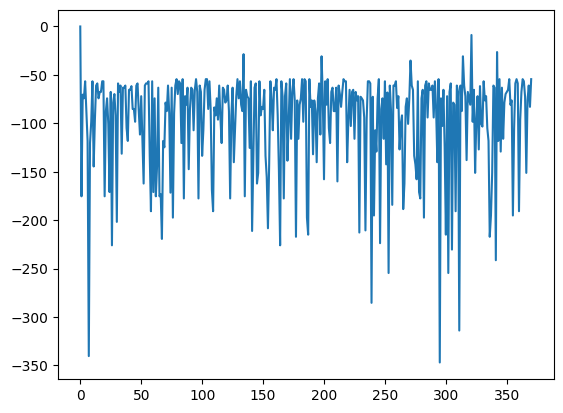

In [ ]:
plt.plot(episodes_rewards)